In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载数据
data = pd.read_feather('features1.feather')

# 提取特征和目标变量
X = data.iloc[:, 1:103]  # x1 ~ x100
y = data['y1']  # 目标变量 y2# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LassoCV

# 定义LASSO回归模型，并使用交叉验证选择最佳alpha
lasso = LassoCV(cv=5)

# 训练模型
lasso.fit(X_train, y_train)

LassoCV(cv=5)

In [20]:
from sklearn.metrics import mean_squared_error

# 使用测试集进行预测
y_pred = lasso.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"测试集的均方误差: {mse}")


测试集的均方误差: 0.10098502106291155


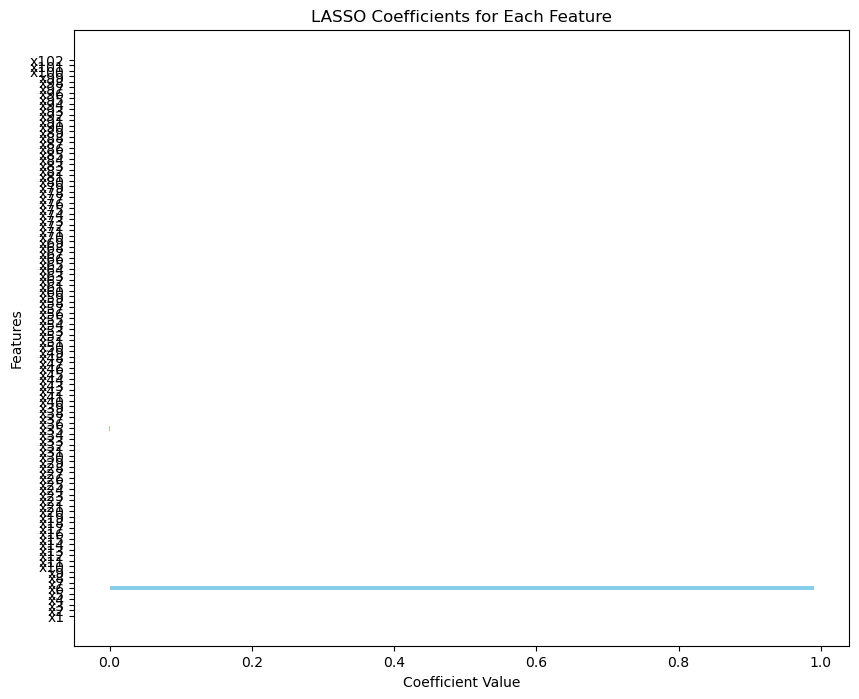

In [21]:
import matplotlib.pyplot as plt
# 获取特征名
feature_names = [f"x{i+1}" for i in range(X.shape[1])]

# 绘制系数条形图
plt.figure(figsize=(10, 8))
plt.barh(feature_names, lasso.coef_, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('LASSO Coefficients for Each Feature')
plt.show()

In [22]:
import numpy as np

# 提取系数及对应的特征名称
coefficients = lasso.coef_
feature_names = [f"x{i+1}" for i in range(X.shape[1])]

# 将特征名称与系数组合在一起，并按系数大小排序
features_with_coefficients = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# 选择前10个重要特征
top_10_features = features_with_coefficients[:10]

# 打印前10个特征及其系数
print("前10个重要特征及其系数:")
for feature, coef in top_10_features:
    print(f"{feature}: {coef}")

前10个重要特征及其系数:
x6: 0.9902467951361095
x35: -0.0003305594743443429
x26: -0.0001457419422058657
x73: -2.7723768517045116e-05
x27: 1.645022998312364e-05
x85: 9.348767971147702e-06
x1: -0.0
x2: 0.0
x3: 0.0
x4: 0.0


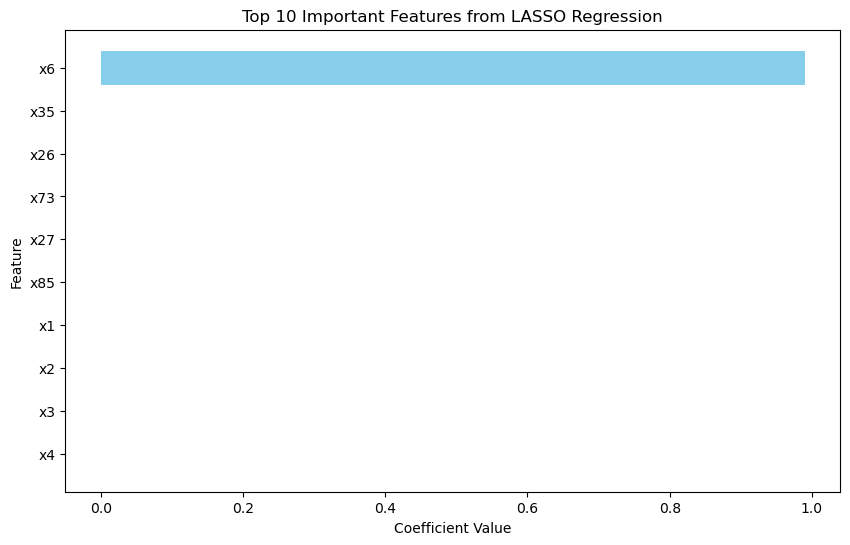

In [23]:
import matplotlib.pyplot as plt

# 分别提取特征名称和系数
top_10_feature_names = [f[0] for f in top_10_features]
top_10_coefficients = [f[1] for f in top_10_features]

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_names, top_10_coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 10 Important Features from LASSO Regression")
plt.gca().invert_yaxis()  # 使得最重要的特征在最上方
plt.show()


In [24]:
# 构建方程字符串
equation_terms = [f"{coef} * {feature}" for feature, coef in top_10_features]
equation = " + ".join(equation_terms)
print(f"y1 = {equation}")

y1 = 0.9902467951361095 * x6 + -0.0003305594743443429 * x35 + -0.0001457419422058657 * x26 + -2.7723768517045116e-05 * x73 + 1.645022998312364e-05 * x27 + 9.348767971147702e-06 * x85 + -0.0 * x1 + 0.0 * x2 + 0.0 * x3 + 0.0 * x4


取前10个特征进行预测

In [25]:
from sklearn.linear_model import Lasso
# 提取前10个特征的列索引
top_10_feature_indices = [int(feature[1:])-1 for feature, _ in top_10_features]

# 使用前10个特征重新训练模型
X_train_top_10 = X_train.iloc[:, top_10_feature_indices]
X_test_top_10 = X_test.iloc[:, top_10_feature_indices]

# 使用前10个特征训练LASSO模型
lasso_top_10 = Lasso(alpha=0.1)
lasso_top_10.fit(X_train_top_10, y_train)

# 使用训练后的模型预测
y_pred_top_10 = lasso_top_10.predict(X_test_top_10)


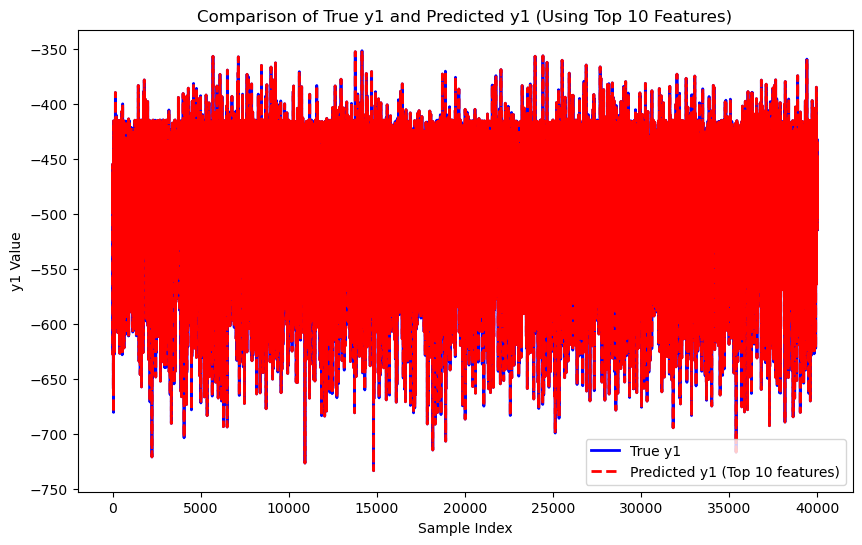

In [26]:

# 绘制原始的y2值曲线和预测曲线
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="True y1", color="blue", linewidth=2)
plt.plot(y_pred_top_10, label="Predicted y1 (Top 10 features)", color="red", linestyle="--", linewidth=2)
plt.legend()
plt.title("Comparison of True y1 and Predicted y1 (Using Top 10 Features)")
plt.xlabel("Sample Index")
plt.ylabel("y1 Value")
plt.show()

In [27]:
# 计算并显示均方误差
mse_top_10 = mean_squared_error(y_test, y_pred_top_10)
print(f"使用前10个特征的预测结果的均方误差: {mse_top_10}")

使用前10个特征的预测结果的均方误差: 1.066642825970996e-05
